In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/creditcard_2023.csv')
df.head(10)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [ ]:
df.shape

(568630, 31)

In [ ]:
#rows_with_null

df[df.isnull().any(axis=1)]

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df.tail(10)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568620,568620,-1.604804,0.972534,-1.749894,1.920681,-1.856257,-0.219136,-1.924278,0.089723,-1.563884,...,-0.425927,1.413597,0.702164,-0.468054,-1.723380,0.571744,0.378728,-3.747798,21149.12,1
568621,568621,-0.739211,0.231882,-0.410204,0.511278,0.056859,-0.410720,-0.383799,-0.313642,0.098006,...,0.283048,-0.603132,-0.479224,-0.453026,-0.005507,-1.644165,-0.913953,1.292782,18363.07,1
568622,568622,-0.838047,0.362350,-0.061538,0.252811,-0.006436,-0.222957,0.015602,-0.760310,1.783928,...,0.561658,-0.270249,-0.491720,1.269701,-0.647563,-1.681372,-3.041399,-1.420988,14631.81,1
568623,568623,-0.873853,0.780667,-0.418023,0.399324,0.522744,0.943413,-0.438929,-1.634671,1.776622,...,2.518959,-1.899197,0.721274,0.269306,-0.850062,-0.652306,-0.153297,1.860894,11591.09,1
568624,568624,-0.542349,0.585098,-0.547730,1.005465,-0.702046,-0.287417,-0.835174,0.382365,-1.281525,...,0.463312,0.705032,-0.124074,0.046466,-0.196141,0.553614,1.222537,1.172982,10145.64,1
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [ ]:
df["Class"].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [ ]:
fraud = df[df["Class"]==1]
valid = df[df["Class"]==0]

print("Fraud transaction cases {}".format(len(fraud)))
print("Valid transaction cases {}".format(len(valid)))

Fraud transaction cases 284315
Valid transaction cases 284315


In [ ]:
print("Amount details of fraud transaction")
fraud.Amount.describe()

Amount details of fraud transaction


count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [ ]:
print("Amount details of valid transaction")
valid.Amount.describe()

Amount details of valid transaction


count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [ ]:
df.dropna()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


## Plotting Correlation Matrix

  The correlation matrix graphicallygives us an idea of how features correlate with each other and can help us predict what features are most relevant for the prediction.

<Axes: >

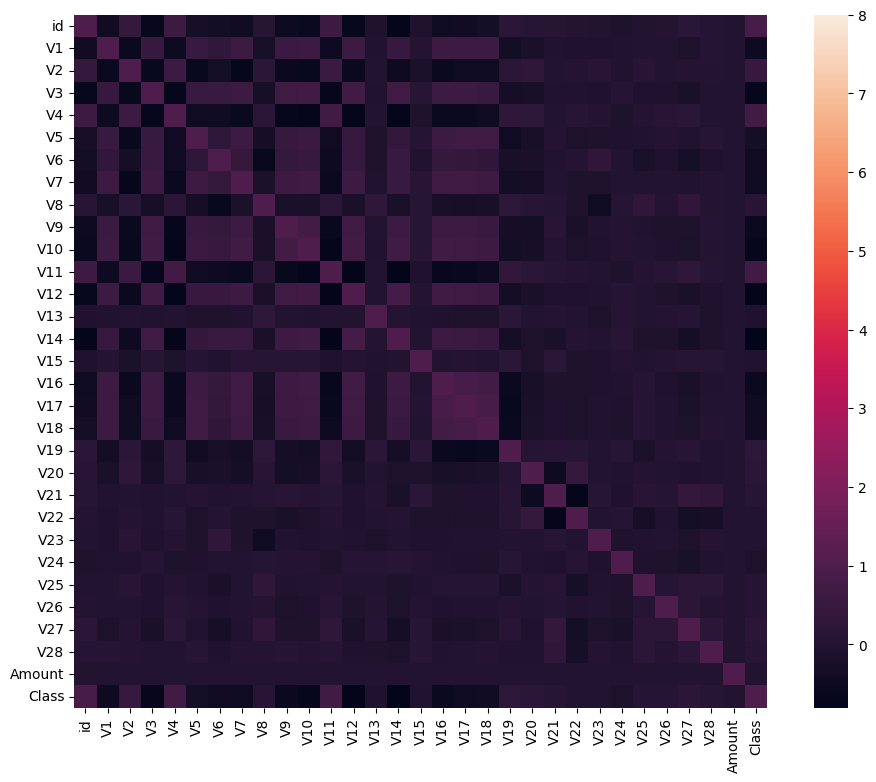

In [ ]:
cor = df.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(cor,vmax=8, square = True)

In [ ]:
  ## In the Heatmap we can see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example V2 and V5 are highly negatively correlated with the feature called Amount, Also there is acorrelation with V20 and Amount This gives us a deeper understanding of the Data available to us.

  # Separating the X and Y values
  
    Dividing the X and Y values
    

In [ ]:
# To divide the X and Y from the dataset
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(568630, 30)
(568630,)


# Training and Testing Data

   Dividing the dataset into Two main groups. One for Training the model and the other for testing The Model's performance

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(xData,yData, test_size = 0.3 , random_state = 42)

# Building a Random Forest Model using scikit learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print(y_pred)

[1 1 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import classification_report , accuracy_score

In [ ]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy score : {}".format(acc*100))

Accuracy score : 99.98182766766908


In [ ]:
print("Classification report : \n",classification_report(y_test,y_pred))

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

